# Practica 4: Detección Multicolinealidad

## Multicolinealidad

In [8]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

In [13]:
datos=dataWoo("hprice1",description=True)
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1 = sm.OLS(y, sm.add_constant(X)).fit()
mco1.summary()

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.


TypeError: 'NoneType' object is not subscriptable

In [17]:
mco1.condition_number #Número de Condición Puede haber dependencia muy alta que daria lugar a problema de
# multicolinealidad, existes dos formas para estudiar esto: FIV, explicar como funciona cada modelo y compararlo con lo demas
# y el NC con el tema de la raiz de valor max alto entre el valor min.

EL CONDITION NUMBER ESTÁ HECHO CON EL NC, POR ESO PODEMOS DECIR QUE ES MODERADO PORQUE TENEMOS EL RESULTADO AL CUADRADO SI LE QUITAMOS LA RAIZ
POR ESO INDICAMOS QUE DE 400 A 900 ES MODERADO, ES DECIR, LA ESTABILIDAD ES MODERADA, QUE PODRÍA HABER UN PROBLEMA.

409.51474625747255

In [18]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

# A PARTIR DE 10 TENEMOS PROBLEMAS DE MULTICOLINEALIDAD, POR LO TANTO AQUÍ DEBERIA DE HABER PROBLEMAS POR ESTOS RESULTADOS
# SIN EMBARGO, NO TIENE SENTIDO DEBIDO A QUE EXISTE RELACIÓN CON LAS VARIABLES YA QUE EL TAMAÑO DE UN PISO DEPENDE DE LO GRANDE QUE SEA, EL NUMERO DE HABITACIONES, ETC.

[284.46202849274715, 320.08665791337097, 22.243172883072834]

In [19]:
vars

['llotsize', 'lsqrft', 'bdrms']

In [21]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)
#MATRIZ DE CORRELACIÓN ENTRE LAS VARIABLES

[[1.         0.31129925 0.16949022]
 [0.31129925 1.         0.51957927]
 [0.16949022 0.51957927 1.        ]]


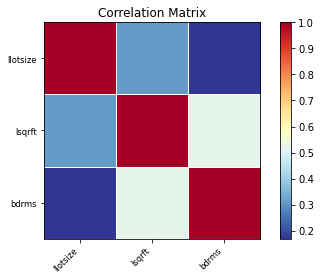

In [ ]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_matrix, xnames=["llotsize", "lsqrft", "bdrms"])
plt.show()

In [24]:
#Datos de Theil
import pandas as pd
datos = pd.read_csv('Theil.csv', delimiter=";")
datos
y=datos['consume']
X=datos[['income', 'relprice']]
mco2 = sm.OLS(y, sm.add_constant(X)).fit()
mco2.summary()

/home/flo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           6.51e-10
Time:                        09:05:27   Log-Likelihood:                -51.647
No. Observations:                  17   AIC:                             109.3
Df Residuals:                      14   BIC:                             111.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.7066     27.094      4.824      0.000      72.595     188.818
income         1.0617      0.267      3.981      0.001       0.490       1.634
relprice      -1.3830      0.084    -16.501      0.000      -1.563      -1.203
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.666
Skew:                          -0.031   Prob(JB):                        0.717
Kurtosis:                       2.032   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[23.43203500693301, 23.43203500693301]
[[1.         0.17884669]
 [0.17884669 1.        ]]


# Normalidad de los Residuos

- Jarque-Bera: Test de hipótesis que contrasta si los datos de la muestra tienen el coeficiente de simetría y la curtósis de una distribución normal.
- $\chi^2$ (p-valor): p-valor del Test de Jaque-Bera.
- Skew: Coeficiente de Simetría de pearson de los residuos.
- Kurtosis: Coeficiente de apuntamiento de los residuos.
- Komogorov-Smirnov: Test de Hipótesis para contrastar si una muestra proviene de una distribución (en este caso normal).

In [26]:
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco1.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera 34.88944582840745
Chi^2 two-tail prob. 2.653707794334824e-08
Skew -0.1875694438990465
Kurtosis 6.061792648532735


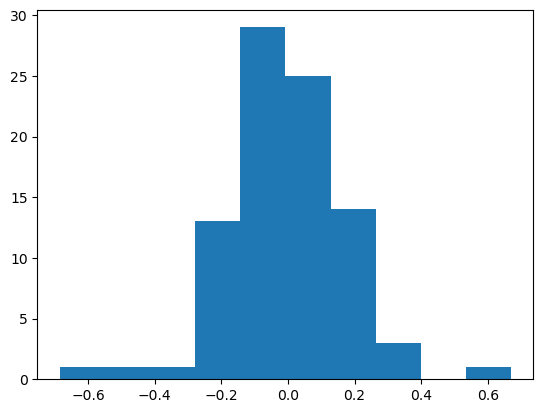

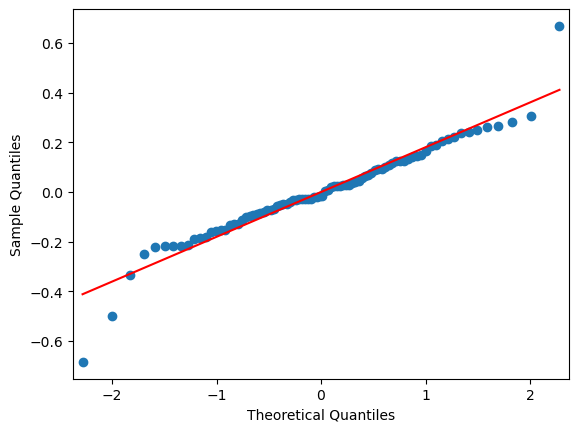

In [27]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

In [38]:
import statsmodels.stats.diagnostic as diag

diag.kstest_normal(mco1.resid)

(0.0664990993677287, 0.4857338239746209)

# Bootstrap

In [37]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1=sm.OLS(y, sm.add_constant(X)).fit()


from random import choices

beta=[]
n=len(y)
for it in range(10000): #repetimos 1000 veces la estimacion
    I=choices(list(range(n)), k=n) # elegimos una muestra con repeticion de los datos
    mco3 = sm.OLS(y[I], sm.add_constant(X.values[I,:])).fit() #ajustamos el modelo
    beta.append(list(mco3.params)) # guardamos los coeficientes
beta=np.array(beta)
k=len(X.T)+1
for i in range(k):
    q025=np.percentile(beta[:,i], 2.5) #percentil 2.5%
    q975=np.percentile(beta[:,i], 97.5) #percentil 97.5%
    media=np.mean(beta[:,i]) #media de los betas
    sd=np.std(beta[:,i]) #desviación tipica de los betas
    print(i, media,[q025, q975])
    

0 -1.3284811253550028 [-2.9725993603402845, 0.14825411413673223]
1 0.18164713073424596 [0.10808029802273694, 0.3168698984094115]
2 0.6890622984481893 [0.4660402797963147, 0.9194975139639149]
3 0.03512148876719092 [-0.03608807768620229, 0.08847476251435969]


In [32]:
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           9.74e-19
Time:                        09:05:56   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""